In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Breast cancer data

In [3]:
!wget https://raw.githubusercontent.com/deepak525/Breast-Cancer-Visualization-and-Classification/master/data.csv

--2025-12-31 18:03:28--  https://raw.githubusercontent.com/deepak525/Breast-Cancer-Visualization-and-Classification/master/data.csv
Résolution de raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connexion à raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 125141 (122K) [text/plain]
Sauvegarde en : « data.csv »

data.csv            100%[===================>] 122,21K  --.-KB/s    ds 0,1s    

2025-12-31 18:03:29 (896 KB/s) — « data.csv » sauvegardé [125141/125141]



In [5]:
df = pd.read_csv("data.csv")

In [6]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


We can use multiple parameters for the classification ($w_1 x_1 + w_2 x_2 +...$)

In [7]:
df.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [8]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [11]:
lab_enc = LabelEncoder()

df["diagnosis_enc"] = lab_enc.fit_transform(df["diagnosis"])  # Encode as integers

lab_enc.classes_

array(['B', 'M'], dtype=object)

Text(0, 0.5, 'radius_mean')

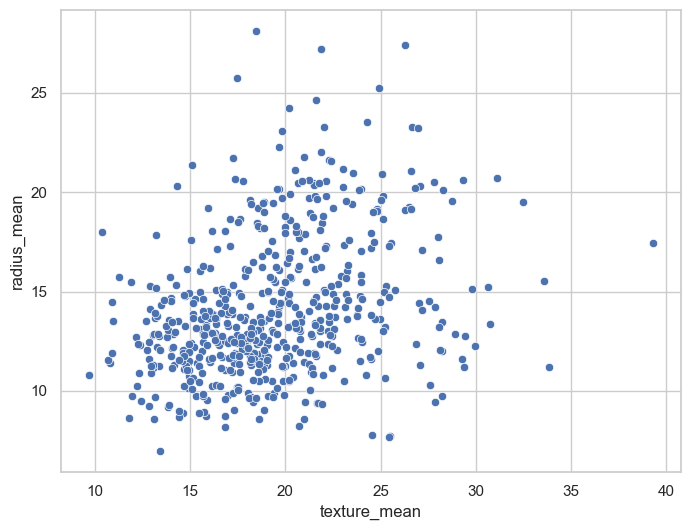

In [12]:
plt.figure(figsize=(8,6), dpi=100)
sns.set_theme(style="whitegrid")

sns.scatterplot(x="texture_mean", y="radius_mean", data=df)

plt.xlabel("texture_mean")
plt.ylabel("radius_mean")

Text(0.5, 1.0, 'Radius distribution')

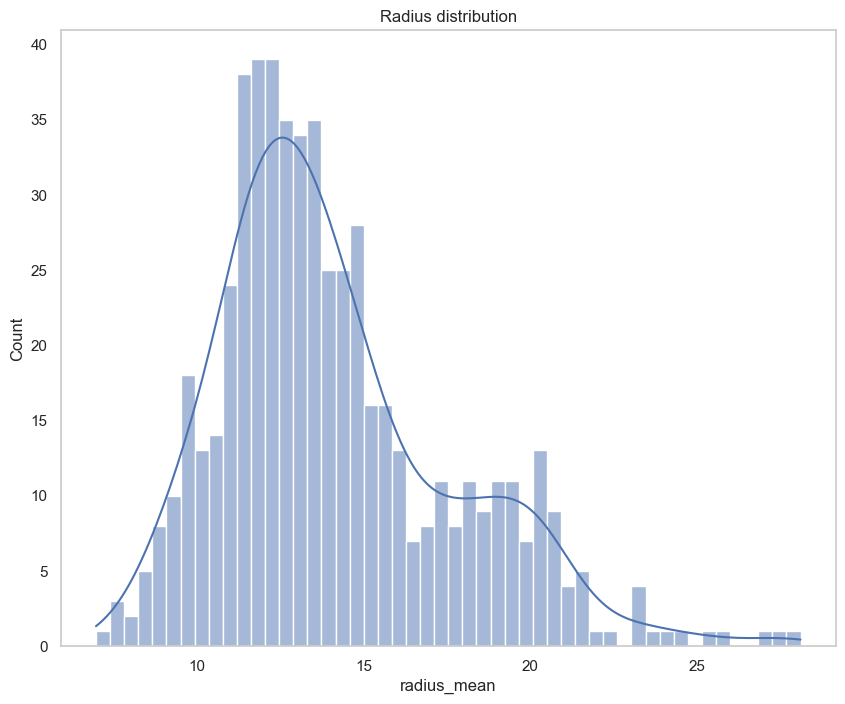

In [13]:
plt.figure(figsize=(10,8), dpi=100)
sns.histplot(df["radius_mean"], kde=True, bins=50)
plt.grid()
plt.title("Radius distribution")

<Axes: xlabel='diagnosis', ylabel='count'>

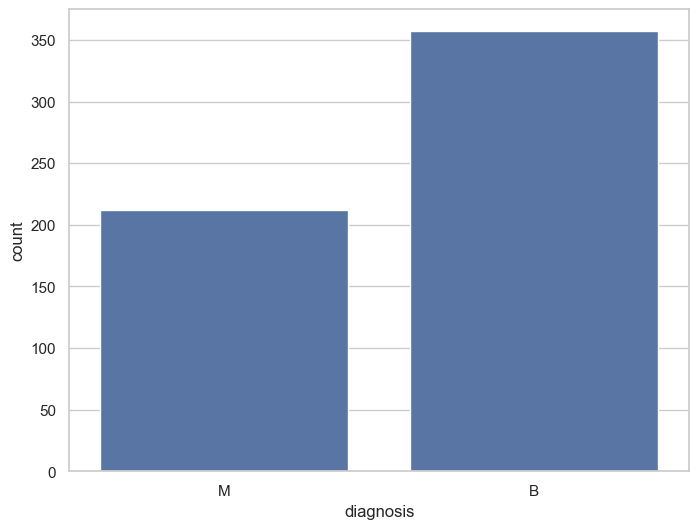

In [14]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(x=df["diagnosis"])

<Axes: >

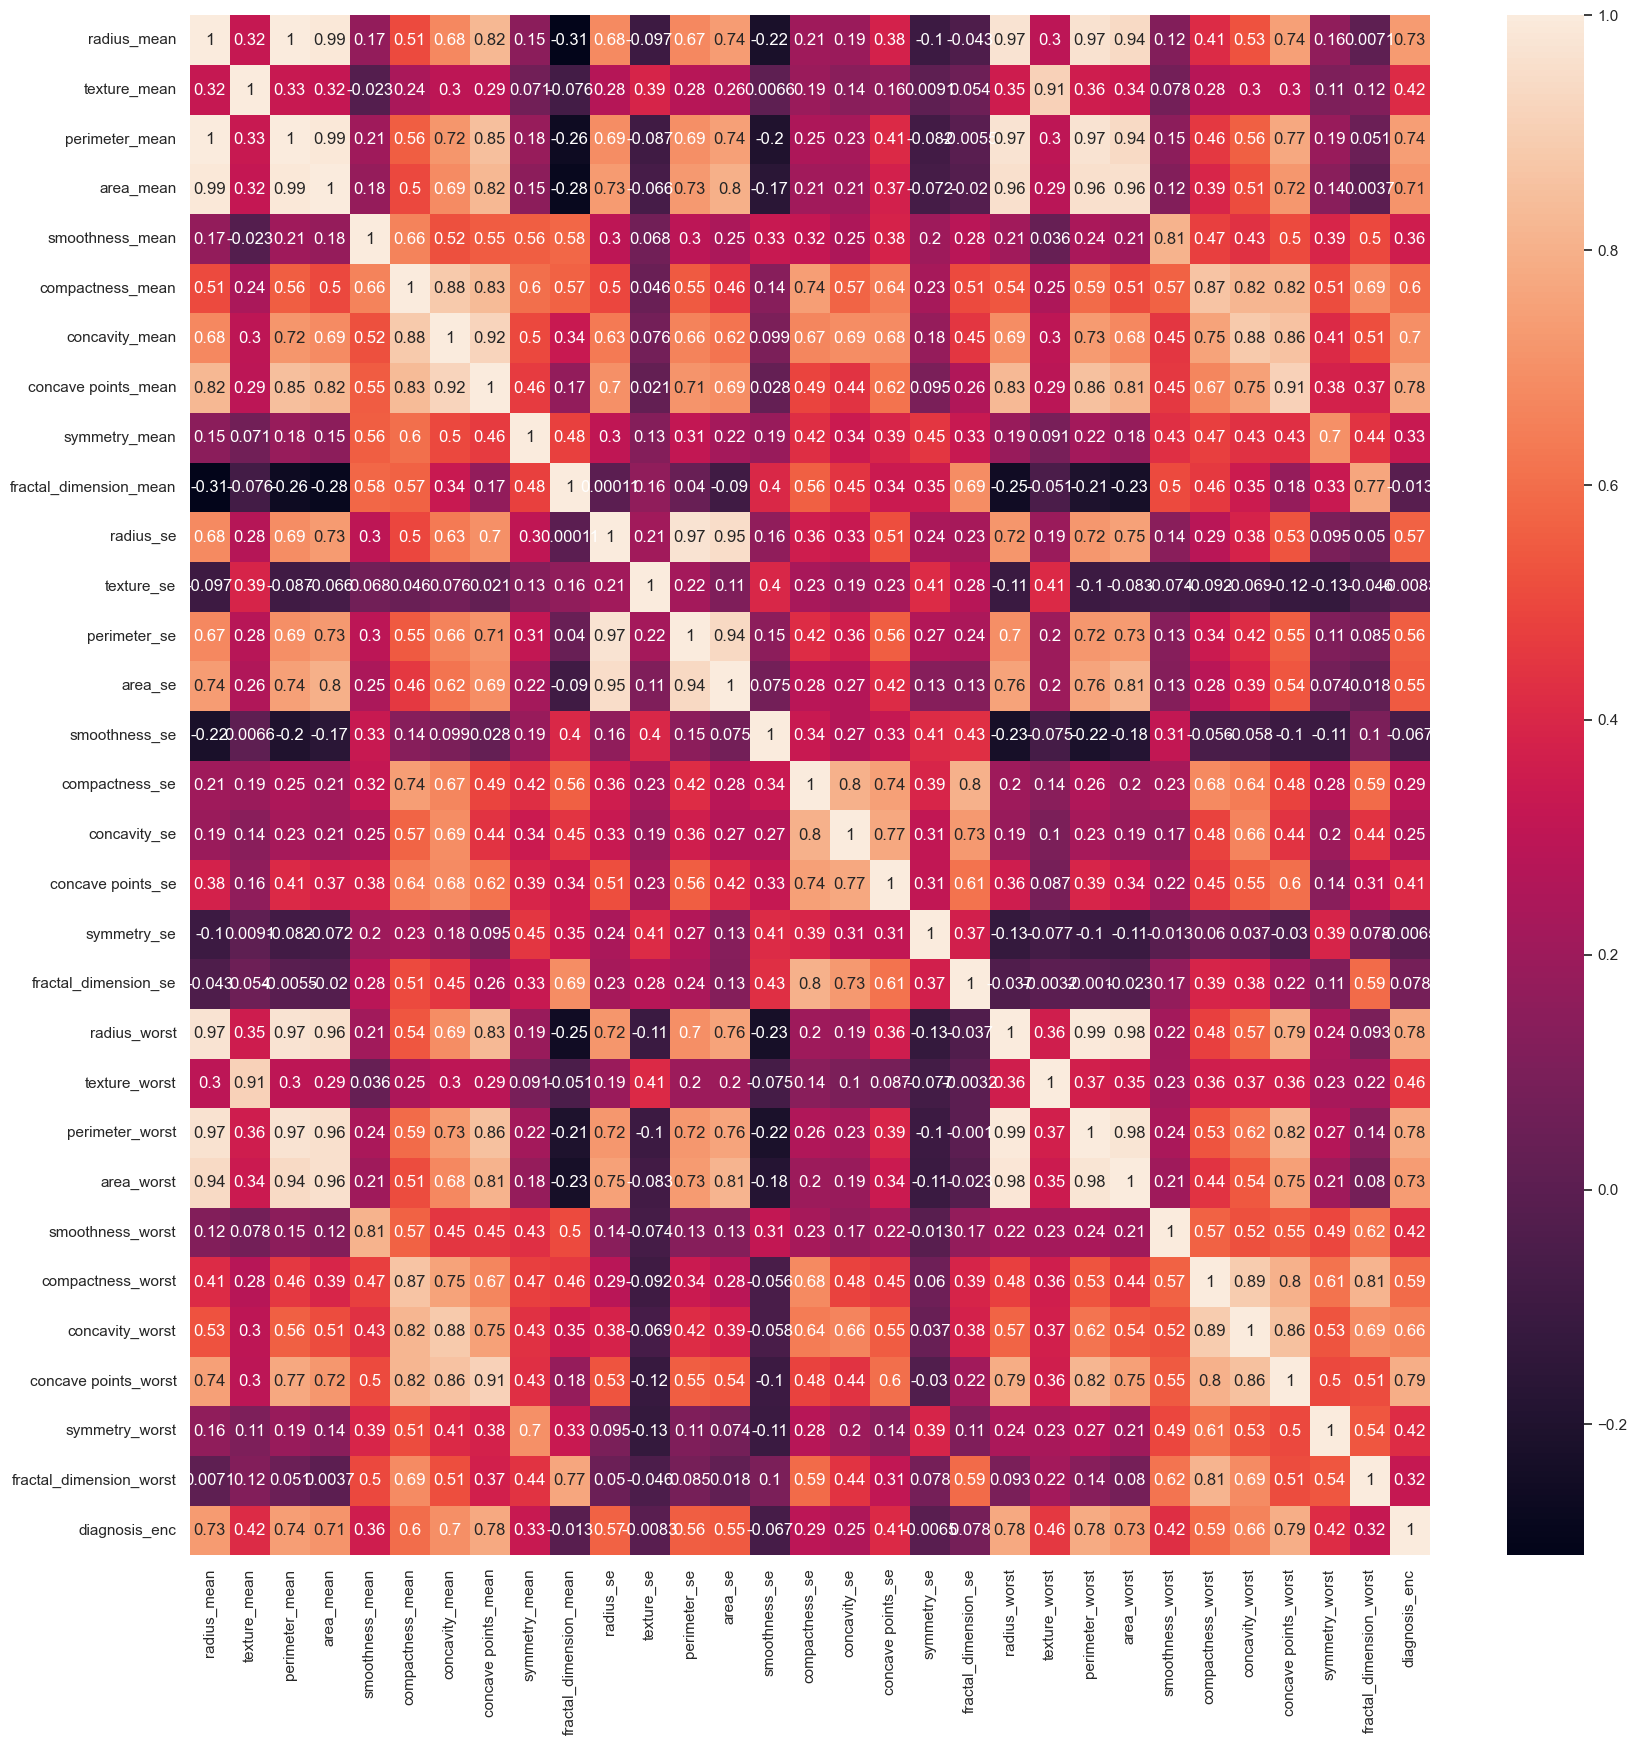

In [21]:
correlations = df.drop(["id", "diagnosis"], axis=1).corr()
plt.figure(figsize=(20,20), dpi=100)
sns.heatmap(correlations, annot=True)

In [22]:
X = df.drop(["id", "diagnosis", "diagnosis_enc"], axis=1)
Y = df["diagnosis_enc"]

In [29]:
# Model 1: just one variable

X2 = X["concave points_worst"]

x_train, x_test, y_train, y_test = train_test_split(X2, Y, test_size=0.2)

model = LogisticRegression()
model.fit(x_train.to_numpy().reshape(-1,1), y_train)
model_pred = model.predict(x_test.to_numpy().reshape(-1,1))

accuracy_score(model_pred, y_test)

0.7982456140350878

In [30]:
# Model 2: all the other features

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

model2 = LogisticRegression()
model2.fit(x_train_scaled, y_train)
model2_pred = model2.predict(x_test_scaled)

accuracy_score(model2_pred, y_test)

0.9912280701754386

In [33]:
confusion_matrix(model2_pred, y_test)

#  True Negatives   False Positives
#  False Negatives  True Positives

array([[71,  1],
       [ 0, 42]])

In [35]:
print(classification_report(model2_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



Accuracy: how often is the classifier correct? 
(TP + TN) / (TP + TN + FP + FN)

Precision: when a positive value is predicted, how often the prediction is correct?
TP / (TP + FP)

Recall: when the actual value is positive, how often is the prediction correct?
TP / (TP + FN)

F1-score: a combination of precision and recall

# 2. Titanic

In [2]:
test = pd.read_csv("/Users/fousseni/Documents/Chiara/titanic/test.csv")
train = pd.read_csv("/Users/fousseni/Documents/Chiara/titanic/train.csv")

In [3]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
test.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Issues:
1. Sex must be converted to 0/1
2. Age have a lot of non null values 
3. Embarked and Cabin also have some missing values

In [6]:
train["Age"] = train["Age"].fillna(
    train["Age"].median()
)

test["Age"] = test["Age"].fillna(
    test["Age"].median()
)

In [7]:
train["Embarked"] = train["Embarked"].fillna(
    train["Embarked"].mode()[0]
)

test["Embarked"] = test["Embarked"].fillna(
    test["Embarked"].mode()[0]
)

In [8]:
test["Fare"] = test["Fare"].fillna(
    test["Fare"].median()
)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
lab_enc = LabelEncoder()
train["Sex_enc"] = lab_enc.fit_transform(train["Sex"])  
test["Sex_enc"] = lab_enc.fit_transform(test["Sex"])  
lab_enc.classes_

array(['female', 'male'], dtype=object)

In [11]:
lab_enc = LabelEncoder()
train["Embarked_enc"] = lab_enc.fit_transform(train["Embarked"])  
test["Embarked_enc"] = lab_enc.fit_transform(test["Embarked"])  
lab_enc.classes_

array(['C', 'Q', 'S'], dtype=object)

In [12]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_enc,Embarked_enc
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S,1,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,2
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S,1,2


<Axes: >

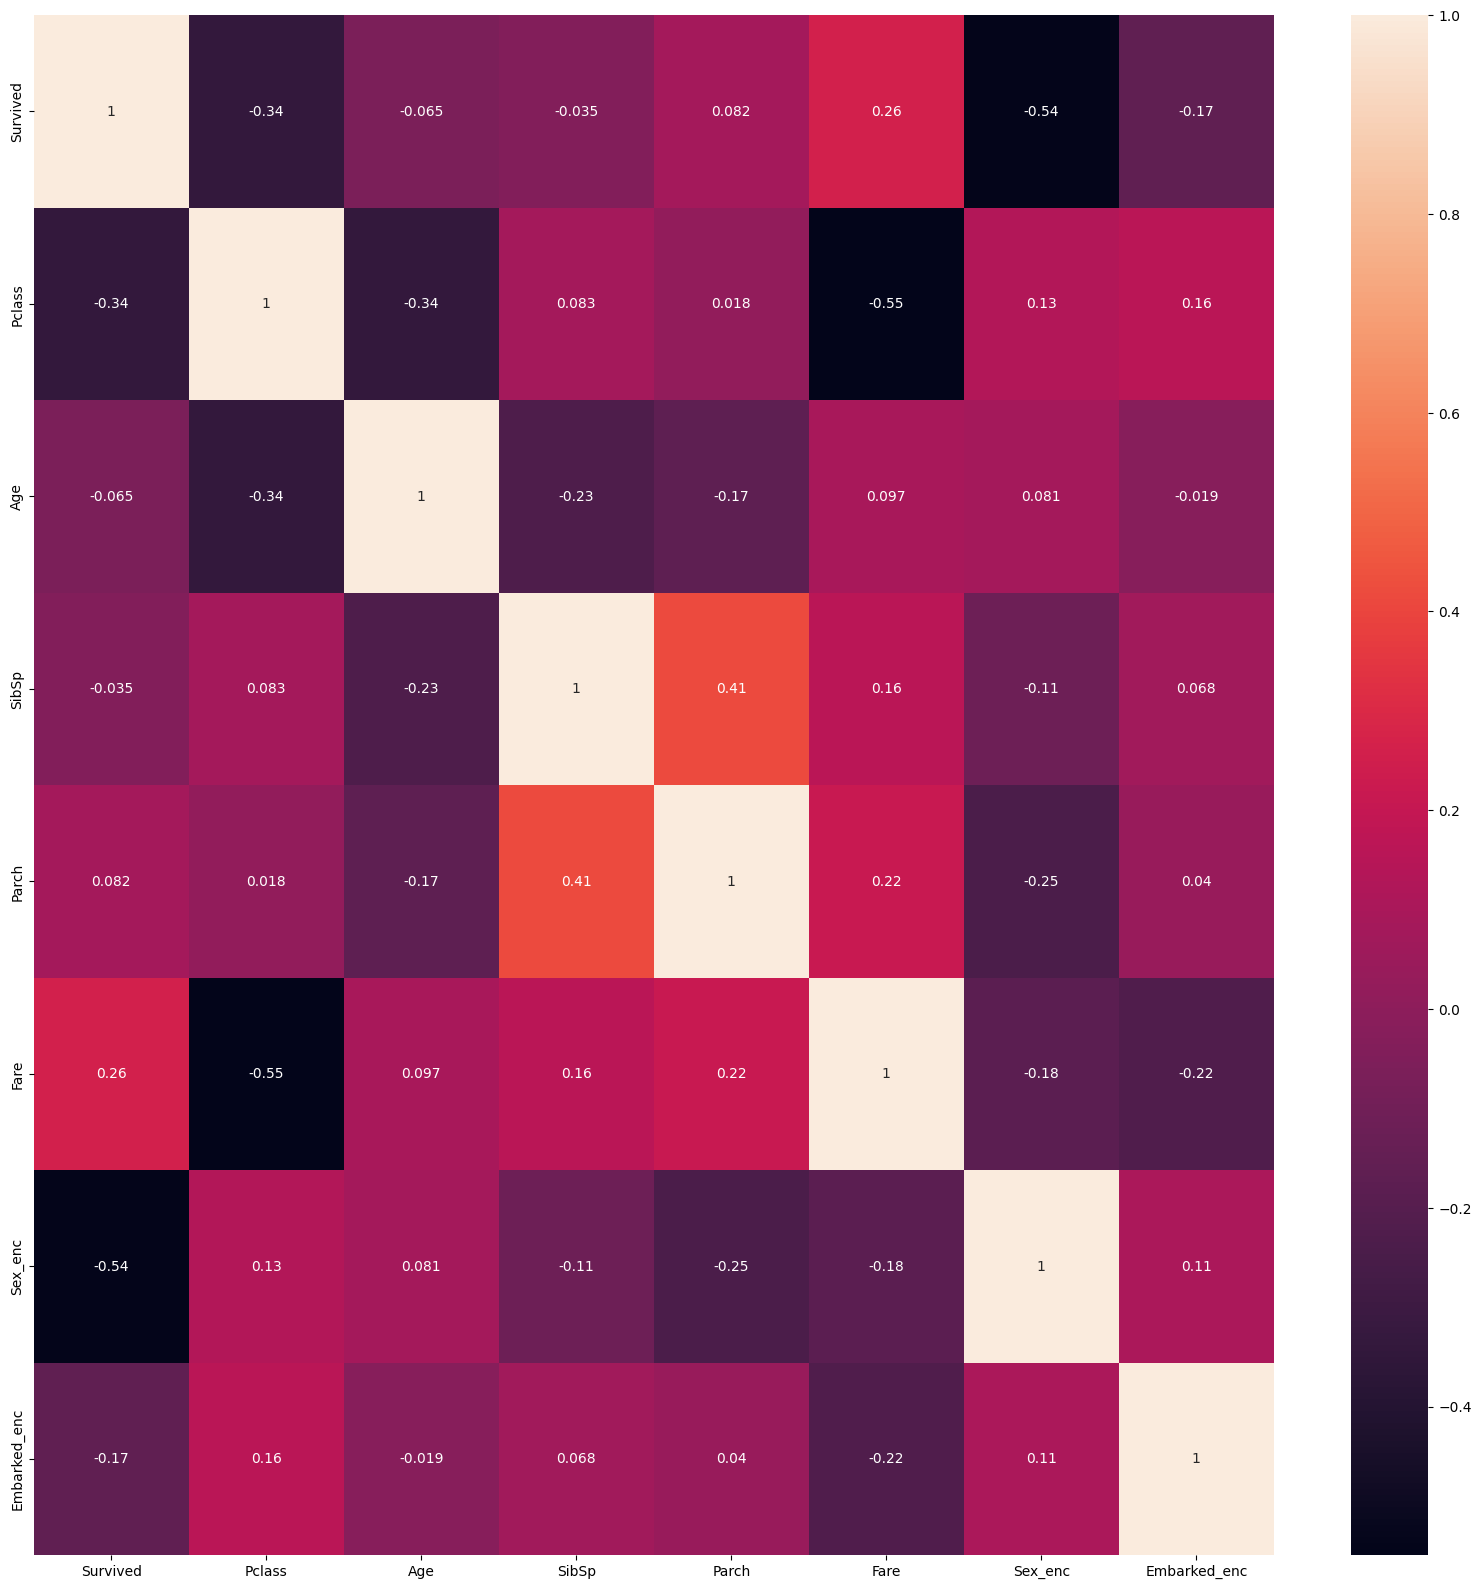

In [13]:
correlations = train.drop(["PassengerId", "Name", "Sex", "Ticket", "Cabin", "Embarked"], axis=1).corr()
plt.figure(figsize=(20,20), dpi=100)
sns.heatmap(correlations, annot=True)

In [14]:
# Test

X = train.drop(["PassengerId", "Survived", "Name", "Sex", "Ticket", "Cabin", "Embarked"], axis=1)
Y = train["Survived"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

model = LogisticRegression()
model.fit(x_train_scaled, y_train)
model_pred = model.predict(x_test_scaled)

accuracy_score(model_pred, y_test)

0.8156424581005587

In [16]:
print(classification_report(model_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       117
           1       0.70      0.82      0.76        62

    accuracy                           0.82       179
   macro avg       0.80      0.82      0.80       179
weighted avg       0.83      0.82      0.82       179



In [17]:
X_train = train.drop(["PassengerId", "Survived", "Name", "Sex", "Ticket", "Cabin", "Embarked"], axis=1)
Y_train = train["Survived"]

In [18]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)

model = LogisticRegression()
model.fit(x_train_scaled, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [19]:
X_test = test.drop(["PassengerId", "Name", "Sex", "Ticket", "Cabin", "Embarked"], axis=1)

scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(X_test)

model = LogisticRegression()
model.fit(x_train_scaled, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [20]:
model_pred = model.predict(x_test_scaled)

In [21]:
model_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [22]:
predictions_df = pd.DataFrame(model_pred, columns=["Survived"])

In [25]:
predictions_df.to_csv("predictions.csv", index=False)